# Using centrality measures to find significant nodes

In [1]:
# one needs to import those packages which are needed; best to be done at the beginning of the program.
import networkx as nx

# you need to install python-louvain first to get access to community (see below)
from networkx.algorithms import community
from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms.community import k_clique_communities
import matplotlib.pyplot as plt
from community import community_louvain
from IPython.display import HTML
from pyvis.network import Network
net = Network()
import gravis as gv
import numpy as np
import scipy as sp
import pandas as pd
from sklearn.linear_model import LinearRegression

import csv

In [2]:
#Reading in our yeast file
yeast_file = "data/yeast_network.txt" 


G0 = nx.read_edgelist(yeast_file,comments="#",nodetype=str)


In [3]:
#Calculating the closeness centrality of all nodes in G0
close_centrality_dict = nx.closeness_centrality(G0)

In [4]:
#Calculating the degree centrality of all node in G0
degree_centrality_dict = nx.degree_centrality(G0)

In [5]:
#Calculating the eigenvector centrality of all node in G0
eigenvector_centrality_dict = nx.eigenvector_centrality(G0)

In [6]:
#Calculating the betweenness centrality of all node in G0
betweenness_centrality_dict = nx.betweenness_centrality(G0)

In [7]:
#Target nodes given by the biochemists
target_nodes = ['YJL034W', 'YFL031W', 'YHR079C'] #KAR2, HAC1, IRE1

In [8]:
#Reading in our CSV file of the DPClus clusters that were found
predicted_clusters = list(csv.reader(open('data/dpclus_complexes.csv')))

In [9]:
#Creating a list of all the nodes with maximum closenness centrality in each cluster
clo_ls = []

for cluster in predicted_clusters: 
    

    first = True

    for node in cluster:
        
        if first == True:
            max_node = node
            max_centrality = close_centrality_dict[node]
            first = False
        else:
            if close_centrality_dict[node] > max_centrality:
                max_node = node
                max_centrality = close_centrality_dict[node]
                
                
    clo_ls.append(max_node)

In [10]:
#Creating a list of all the nodes with maximum degree centrality in each cluster
deg_ls = []

for cluster in predicted_clusters: 
    

    first = True

    for node in cluster:
        
        if first == True:
            max_node = node
            max_centrality = degree_centrality_dict[node]
            first = False
        else:
            if degree_centrality_dict[node] > max_centrality:
                max_node = node
                max_centrality = degree_centrality_dict[node]
                
                
    deg_ls.append(max_node)

In [11]:
#Creating a list of all the nodes with maximum eigenvector centrality in each cluster
eig_ls = []

for cluster in predicted_clusters: 
    

    first = True

    for node in cluster:
        
        if first == True:
            max_node = node
            max_centrality = eigenvector_centrality_dict[node]
            first = False
        else:
            if eigenvector_centrality_dict[node] > max_centrality:
                max_node = node
                max_centrality = eigenvector_centrality_dict[node]
                
                
    eig_ls.append(max_node)

In [12]:
#Creating a list of all the nodes with maximum betweenness centrality in each cluster
bet_ls = []

for cluster in predicted_clusters: 
    

    first = True

    for node in cluster:
        
        if first == True:
            max_node = node
            max_centrality = betweenness_centrality_dict[node]
            first = False
        else:
            if betweenness_centrality_dict[node] > max_centrality:
                max_node = node
                max_centrality = betweenness_centrality_dict[node]
                
                
    bet_ls.append(max_node)

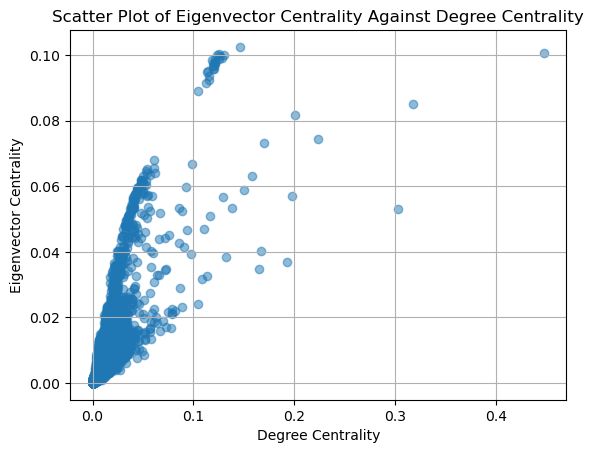

In [13]:
# Extract the centralities for plotting
eigenvector_centralities = list(eigenvector_centrality_dict.values())
degree_centralities = list(degree_centrality_dict.values())

# Plotting the scatter plot
plt.scatter(degree_centralities, eigenvector_centralities, alpha=0.5)
plt.xlabel('Degree Centrality')
plt.ylabel('Eigenvector Centrality')
plt.title('Scatter Plot of Eigenvector Centrality Against Degree Centrality')
plt.grid(True)
plt.show()


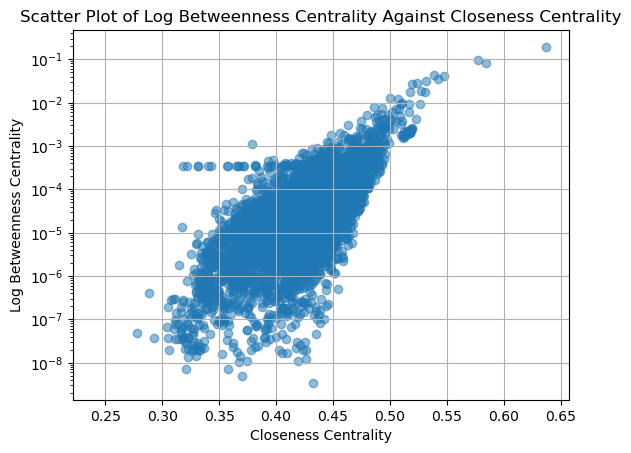

In [14]:
# Extract the centralities for plotting
betweenness_centralities = list(betweenness_centrality_dict.values())
close_centralities = list(close_centrality_dict.values())

# Plotting the scatter plot
plt.scatter(close_centralities, betweenness_centralities, alpha=0.5)
plt.xlabel('Closeness Centrality')
plt.ylabel('Log Betweenness Centrality')
plt.title('Scatter Plot of Log Betweenness Centrality Against Closeness Centrality')
plt.grid(True)
plt.yscale("log")
plt.show()

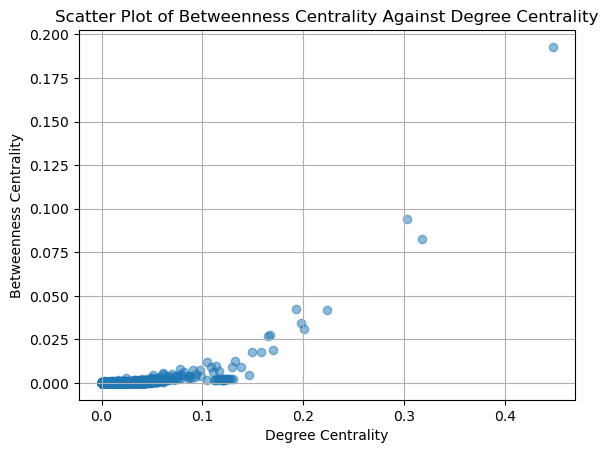

In [15]:
# Plotting the scatter plot
plt.scatter(degree_centralities, betweenness_centralities, alpha=0.5)
plt.xlabel('Degree Centrality')
plt.ylabel('Betweenness Centrality')
plt.title('Scatter Plot of Betweenness Centrality Against Degree Centrality')
plt.grid(True)
plt.show()

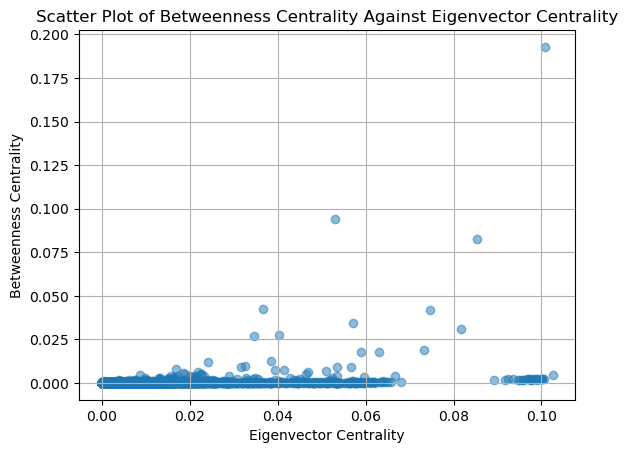

In [16]:
# Plotting the scatter plot
plt.scatter(eigenvector_centralities, betweenness_centralities, alpha=0.5)
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Betweenness Centrality')
plt.title('Scatter Plot of Betweenness Centrality Against Eigenvector Centrality')
plt.grid(True)
plt.show()

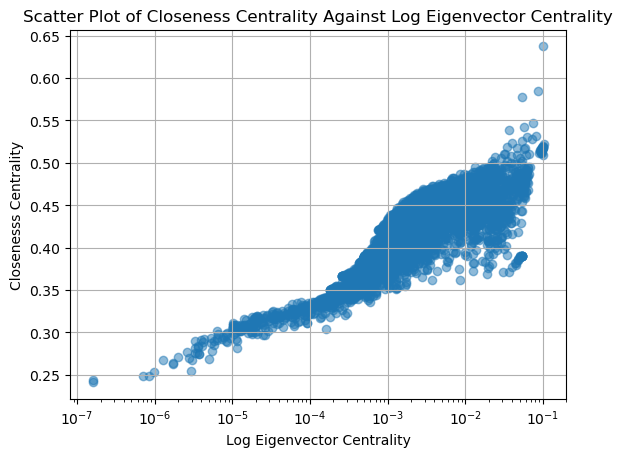

In [17]:
#Plotting the scatter plot
plt.scatter(eigenvector_centralities, close_centralities, alpha=0.5)
plt.xlabel('Log Eigenvector Centrality')
plt.ylabel('Closenesss Centrality')
plt.title('Scatter Plot of Closeness Centrality Against Log Eigenvector Centrality')
plt.grid(True)
plt.xscale("log")
plt.show()

In [18]:
#Finding the clusters with the same node for maximum eigenvector and betweenness centrality
set1 = set(bet_ls)
set2 = set(eig_ls)

# Find the common elements
common_elements = set1.intersection(set2)

bet_eig_nodes = list(common_elements)

In [19]:
# Initialize a list to store clusters containing target nodes
clusters_with_target_nodes = []

# Iterate through each cluster
for cluster in predicted_clusters:
    # Check if any target nodes are in this cluster
    target_nodes_in_cluster = [node for node in cluster if node in target_nodes]
    
    # If there are target nodes in this cluster, add it to the list
    if target_nodes_in_cluster:
        clusters_with_target_nodes.append({
            "cluster": cluster,
            "target_nodes": target_nodes_in_cluster
        })

# Print the clusters with target nodes
for cluster_info in clusters_with_target_nodes:
    print("Cluster:", cluster_info["cluster"])
    print("Target Nodes in Cluster:", cluster_info["target_nodes"])
    print("\n")

Cluster: ['YOR085W', 'YOR002W', 'YGL226C-A', 'YFL031W', 'YOR067C', 'YOR103C', 'YPL227C', 'YGR227W', 'YJL002C', 'YMR149W', 'YGL022W', 'YEL002C', 'YBL082C', 'YNR030W', 'YML019W', 'YNL219C']
Target Nodes in Cluster: ['YFL031W']


Cluster: ['YAL058W', 'YDR414C', 'YMR200W', 'YBR015C', 'YHR101C', 'YJR075W', 'YJL034W', 'YMR214W', 'YBR229C', 'YOR336W']
Target Nodes in Cluster: ['YJL034W']


Cluster: ['YFL025C', 'YHR030C', 'YML008C', 'YFL031W', 'YMR307W', 'YJR073C', 'YGR167W', 'YGL084C', 'YCR044C', 'YHR079C']
Target Nodes in Cluster: ['YFL031W', 'YHR079C']




In [20]:
#Creating data frame of clusters with same protein having the highest betweenness and eigenvector centrality in it's cluster
data = {
    "Node/Protein": bet_eig_nodes,
    "Betweenness Centrality": [betweenness_centrality_dict.get(node, None) for node in bet_eig_nodes],
    "Eigenvector Centrality": [eigenvector_centrality_dict.get(node, None) for node in bet_eig_nodes]
}

df = pd.DataFrame(data)

# Calculate the "Average" column
df["Average"] = (df["Betweenness Centrality"] + df["Eigenvector Centrality"]) / 2

df 

,Node/Protein,Betweenness Centrality,Eigenvector Centrality,Average
0,YPL084W,0.000081,0.007038,0.003559
1,YAL001C,0.000392,0.003628,0.002010
2,YFL031W,0.000928,0.008681,0.004805
3,YLR262C,0.000558,0.008438,0.004498
4,YDL064W,0.000544,0.011951,0.006247
...,...,...,...,...
79,YDR418W,0.000180,0.052706,0.026443
80,YEL031W,0.000269,0.006988,0.003628
81,YDL100C,0.000271,0.006398,0.003334
82,YJL034W,0.000982,0.021425,0.011204


In [21]:
cluster_network = nx.Graph()

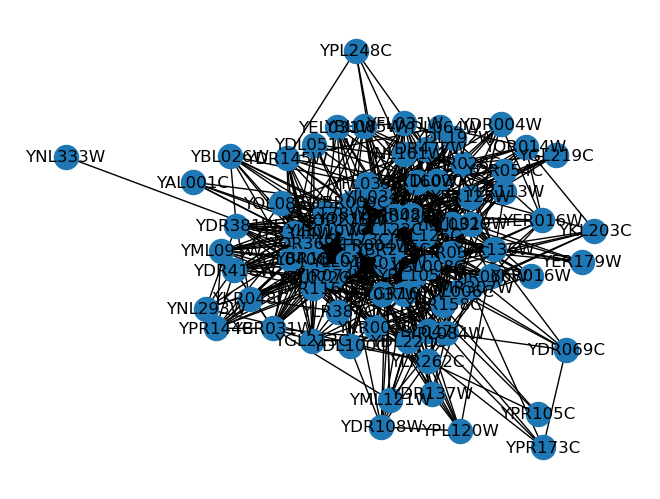

In [22]:
# Add the nodes from bet_eig_nodes
for node in bet_eig_nodes:
    cluster_network.add_node(node, label=str(node))

# Add edges based on connections in the original network
for i in range(len(bet_eig_nodes)):
    for j in range(i + 1, len(bet_eig_nodes)):
        n1 = bet_eig_nodes[i]
        n2 = bet_eig_nodes[j]
        if G0.has_edge(n1, n2):
            cluster_network.add_edge(n1, n2)

# Visualizing this network through networkx
nx.draw(cluster_network, with_labels=True)

In [23]:
#Creating a basic pyvis visualisation of the network
PPI_subgraph = Network(notebook = True, bgcolor="#222222", font_color="white")

# set the physics layout of the network
PPI_subgraph.barnes_hut(gravity = -8000, overlap = 1, damping = 0.2)
#print(cluster_rep)
nodes = []
for i in range(0, len(bet_eig_nodes)):
    l = [bet_eig_nodes[i]]
    nodes.append(l)
#print(nodes)
for n in nodes:
    PPI_subgraph.add_node(n[0], title = str(node))
    #print(n[0], n[1], n[2])
    
for node in bet_eig_nodes: 
    PPI_subgraph.add_node(node, label=str(node))

for i in range(len(bet_eig_nodes)):
    for j in range(i+1, len(bet_eig_nodes)):  # Fix the loop range
        n1 = bet_eig_nodes[i]
        n2 = bet_eig_nodes[j]
        if G0.has_edge(n1, n2):  # Check if there is an edge between n1 and n2 in G0
            PPI_subgraph.add_edge(n1, n2)  
                    
neighbor_map = PPI_subgraph.get_adj_list()

PPI_subgraph.show("PPIsubgraph_basic.html")

PPIsubgraph_basic.html


In [24]:
# Create a PyVis network for visualization with colour coordination colouring target nodes as black
PPI_subgraph = Network(notebook=True, bgcolor="#222222", font_color="white")

PPI_subgraph.barnes_hut(gravity = -8000, overlap = 1, damping = 0.2)

# Loop through the nodes and add them to the PyVis network
for node in bet_eig_nodes:
    # Check if this node is in your target nodes
    if node in target_nodes:
        PPI_subgraph.add_node(node, title=str(node), color="black")
    else:
        PPI_subgraph.add_node(node, title=str(node), color="blue")  # You can change the color as needed

# Add edges to the Pyvis network and set edge color for target nodes
for i in range(len(bet_eig_nodes)):
    for j in range(i+1, len(bet_eig_nodes)):
        n1 = bet_eig_nodes[i]
        n2 = bet_eig_nodes[j]
        if n1 in ['YJL034W', 'YFL031W']:
            edge_color = 'black'
        elif n2 in ['YJL034W', 'YFL031W']: 
            edge_color = 'black'
        else: 
            edge_color = 'blue'
        if G0.has_edge(n1, n2):
            PPI_subgraph.add_edge(n1, n2, color=edge_color)

# Get adjacency list for the PyVis network
neighbor_map = PPI_subgraph.get_adj_list()

# Show the PyVis network
PPI_subgraph.show("PPIsubgraph_targetnodes1.html")

PPIsubgraph_targetnodes1.html


In [25]:
#Calculating the betweenness centrality of all nodes in cluster_network
betweenness_centrality_dict = nx.betweenness_centrality(cluster_network)
#Calculating the eigenvector centrality of all nodes in cluster_network
eigenvector_centrality_dict = nx.eigenvector_centrality(cluster_network)

In [26]:
#Making a data frame for the centralities of cluster_network
data1 = {
    "Node/Protein": bet_eig_nodes,
    "Betweenness Centrality": [betweenness_centrality_dict.get(node, None) for node in bet_eig_nodes],
    "Eigenvector Centrality": [eigenvector_centrality_dict.get(node, None) for node in bet_eig_nodes]
}

df_cluster_network = pd.DataFrame(data1)

# Calculate the "Average" column
df_cluster_network["Average"] = (df_cluster_network["Betweenness Centrality"] + df_cluster_network["Eigenvector Centrality"]) / 2

df_cluster_network

,Node/Protein,Betweenness Centrality,Eigenvector Centrality,Average
0,YPL084W,0.006631,0.071834,0.039232
1,YAL001C,0.000031,0.036219,0.018125
2,YFL031W,0.002744,0.064592,0.033668
3,YLR262C,0.012592,0.042176,0.027384
4,YDL064W,0.004145,0.060053,0.032099
...,...,...,...,...
79,YDR418W,0.001001,0.114130,0.057566
80,YEL031W,0.001235,0.047039,0.024137
81,YDL100C,0.002189,0.047767,0.024978
82,YJL034W,0.006338,0.120528,0.063433


In [27]:
# Sort the DataFrame by the "Average" column in descending order
df_cluster_network = df_cluster_network.sort_values(by="Average", ascending=False)

# Select the top 30 rows
top_5_nodes = df_cluster_network.head(5)
top_5_nodes
top_5_nodes_list = top_5_nodes["Node/Protein"].tolist()
#top_5_nodes
top_5_nodes_list

['YGL122C', 'YLL013C', 'YBR245C', 'YBR010W', 'YBL072C']

In [28]:
#Plotting the network identifying the top five highest average centrality nodes in orange
# Create the Pyvis network
PPI_subgraph = Network(notebook=True, bgcolor="#222222", font_color="white")

# Set the physics layout of the network
PPI_subgraph.barnes_hut(gravity=-8000, overlap=1, damping=0.2)

# Add nodes to the Pyvis network and set node colors
for node in bet_eig_nodes:
    if node in ['YJL034W', 'YFL031W']:
        PPI_subgraph.add_node(node, label=str(node), color='black')
    elif node in top_5_nodes_list:
        PPI_subgraph.add_node(node, label=str(node), color='orange')
    else:
        PPI_subgraph.add_node(node, label=str(node), color='blue')

# Add edges to the Pyvis network and set edge color for target nodes
for i in range(len(bet_eig_nodes)):
    for j in range(i+1, len(bet_eig_nodes)):
        n1 = bet_eig_nodes[i]
        n2 = bet_eig_nodes[j]
        if n1 in ['YJL034W', 'YFL031W']:
            edge_color = 'black'
        elif n2 in ['YJL034W', 'YFL031W']: 
            edge_color = 'black'
        else: 
            edge_color = 'blue'
        if G0.has_edge(n1, n2):
            PPI_subgraph.add_edge(n1, n2, color=edge_color)

# Display the Pyvis network
PPI_subgraph.show("PPIsubgraph_with_topnodes.html")

PPIsubgraph_with_topnodes.html


The only node that isn't one edge away from our target nodes is YBR245C, which is the third highest average centrality in the network

In [29]:
#Finding all of the shortest paths between target nodes and YBR245C
all_shortest_paths_YJL = list(nx.all_shortest_paths(cluster_network, source= 'YJL034W', target= top_5_nodes_list[2]))
all_shortest_paths_YJL

[['YJL034W', 'YPR042C', 'YBR245C'],
 ['YJL034W', 'YJL019W', 'YBR245C'],
 ['YJL034W', 'YNL161W', 'YBR245C'],
 ['YJL034W', 'YLL013C', 'YBR245C'],
 ['YJL034W', 'YOR369C', 'YBR245C'],
 ['YJL034W', 'YIR010W', 'YBR245C'],
 ['YJL034W', 'YBL072C', 'YBR245C'],
 ['YJL034W', 'YOL040C', 'YBR245C'],
 ['YJL034W', 'YMR116C', 'YBR245C'],
 ['YJL034W', 'YBR181C', 'YBR245C'],
 ['YJL034W', 'YLR344W', 'YBR245C'],
 ['YJL034W', 'YBL047C', 'YBR245C'],
 ['YJL034W', 'YGL122C', 'YBR245C'],
 ['YJL034W', 'YEL031W', 'YBR245C']]

In [30]:
all_shortest_paths_YFL = list(nx.all_shortest_paths(cluster_network, source= 'YFL031W', target= top_5_nodes_list[2]))
all_shortest_paths_YFL
#Thus, YJL034W or KAR2 is only 2 edges away from YBR245C

[['YFL031W', 'YPR042C', 'YBR245C'],
 ['YFL031W', 'YDR477W', 'YBR245C'],
 ['YFL031W', 'YDL020C', 'YBR245C'],
 ['YFL031W', 'YBR010W', 'YBR245C'],
 ['YFL031W', 'YGL173C', 'YBR245C'],
 ['YFL031W', 'YHR030C', 'YBR245C'],
 ['YFL031W', 'YGL122C', 'YBR245C'],
 ['YFL031W', 'YEL031W', 'YBR245C'],
 ['YFL031W', 'YBR009C', 'YBR245C']]

In [31]:
target_node_1 = 'YBR245C'

# Calculate shortest path lengths from all nodes to the target node
shortest_paths = nx.single_source_shortest_path_length(cluster_network, target_node_1)

# Calculate the average shortest path length
average_shortest_path = sum(shortest_paths.values()) / len(shortest_paths)

average_shortest_path
#average shortest path is 1.476 edges, this it seems significant that our target nodes are both two edges away from YBR245C

1.4761904761904763

In [32]:
# Create a copy of your original cluster_network to avoid modifying the original 
cluster_network_copy = cluster_network.copy()

# Extract the second element from each shortest path
nodes_to_remove = set(path[1] for path in all_shortest_paths_YJL) | set(path[1] for path in all_shortest_paths_YFL)

# Remove the nodes from the copy of the network
cluster_network_copy.remove_nodes_from(nodes_to_remove)
#This then gives a network with all of the middle nodes in the shortest path removed, so now the effect on the shortests paths of this modifdied network can be examined

In [33]:
#Finding all of the shortest paths between 
all_shortest_paths_YJL_1 = list(nx.all_shortest_paths(cluster_network_copy, source= 'YJL034W', target= top_5_nodes_list[2]))
all_shortest_paths_YJL_1
#second_elements = [path[1] for path in all_shortest_paths]
#second_elements
all_shortest_paths_YFL_1 = list(nx.all_shortest_paths(cluster_network_copy, source= 'YFL031W', target= top_5_nodes_list[2]))
all_shortest_paths_YFL_1
#Now, the shortest paths are tied with the longest paths in the network. Thus, reducing this does not hinder the topology of the network

[['YFL031W', 'YDL192W', 'YJR089W', 'YBR245C'],
 ['YFL031W', 'YMR307W', 'YJR089W', 'YBR245C'],
 ['YFL031W', 'YMR307W', 'YGL178W', 'YBR245C'],
 ['YFL031W', 'YBR160W', 'YGL178W', 'YBR245C'],
 ['YFL031W', 'YMR307W', 'YBL105C', 'YBR245C'],
 ['YFL031W', 'YBR160W', 'YBL105C', 'YBR245C'],
 ['YFL031W', 'YMR307W', 'YDL220C', 'YBR245C'],
 ['YFL031W', 'YBR160W', 'YDL220C', 'YBR245C'],
 ['YFL031W', 'YMR307W', 'YDR137W', 'YBR245C'],
 ['YFL031W', 'YGR167W', 'YDR108W', 'YBR245C'],
 ['YFL031W', 'YGR167W', 'YLR384C', 'YBR245C'],
 ['YFL031W', 'YBR160W', 'YPL248C', 'YBR245C'],
 ['YFL031W', 'YBR160W', 'YOR014W', 'YBR245C'],
 ['YFL031W', 'YBR160W', 'YBL085W', 'YBR245C'],
 ['YFL031W', 'YBR160W', 'YER125W', 'YBR245C'],
 ['YFL031W', 'YBR160W', 'YHR158C', 'YBR245C'],
 ['YFL031W', 'YBR160W', 'YML032C', 'YBR245C']]

In [34]:
#Now, making a list of all the nodes in the shortest paths of target proteins in cluster_network
middle_nodes = set()

for path in all_shortest_paths_YJL:
    middle_nodes.update(path[1:-1])

for path in all_shortest_paths_YFL:
    middle_nodes.update(path[1:-1])
middle_nodes = list(middle_nodes)

In [35]:
# Create the Pyvis network with black being target nodes, orange being the YBR245C node, grey being middle nodes in shortest path to YBR245C, and blue being else
PPI_subgraph = Network(notebook=True, bgcolor="#222222", font_color="white")

# Set the physics layout of the network
PPI_subgraph.barnes_hut(gravity=-8000, overlap=1, damping=0.2)

# Add nodes to the Pyvis network and set node colors
for node in bet_eig_nodes:
    if node in ['YJL034W', 'YFL031W']:
        PPI_subgraph.add_node(node, label=str(node), color='black')
    elif node in top_5_nodes_list[2]:
        PPI_subgraph.add_node(node, label=str(node), color='orange')
    elif node in middle_nodes:
        PPI_subgraph.add_node(node, label=str(node), color='grey')
    else:
        PPI_subgraph.add_node(node, label=str(node), color='blue')

# Add edges to the Pyvis network and set edge color for target nodes
for i in range(len(bet_eig_nodes)):
    for j in range(i+1, len(bet_eig_nodes)):
        n1 = bet_eig_nodes[i]
        n2 = bet_eig_nodes[j]
        if n1 in ['YJL034W', 'YFL031W']:
            edge_color = 'black'
        elif n2 in ['YJL034W', 'YFL031W']: 
            edge_color = 'black'
        else: 
            edge_color = 'blue'
        if G0.has_edge(n1, n2):
            PPI_subgraph.add_edge(n1, n2, color=edge_color)

# Display the Pyvis network
PPI_subgraph.show("PPIsubgraph_fullcomplex.html")

PPIsubgraph_fullcomplex.html


In the graph there are only two protein apart from the protein with the highest centrality that has one edge to both target proteins. These are the proteins YEL031W and YPR042C. Therefore, these nodes are seen as significant

# Formal programming part completed